# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [3]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [7]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()
type(df['reviews'][0])

str

In [10]:
df.to_csv(r"C:\Users\Sidha\Downloads\BA Forage\data\BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [16]:
# Replacing instances of unnecessary text
df['reviews'] = df['reviews'].str.replace('✅ Trip Verified |', '')
df['reviews'] = df['reviews'].str.replace('Not Verified |', '')

C:\Users\Sidha\AppData\Local\Temp\ipykernel_10576\4217735727.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['reviews'] = df['reviews'].str.replace('✅ Trip Verified |', '')
C:\Users\Sidha\AppData\Local\Temp\ipykernel_10576\4217735727.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['reviews'] = df['reviews'].str.replace('Not Verified |', '')


In [17]:
print(df)

                                               reviews
0    |  Overall not bad. Staff look tired and overw...
1     | This was our first flight with British Airw...
2     | I recently encountered a highly disappointi...
3    |  Beware! BA don't provide any refund due to ...
4     |  Check in was chaotic and badly organised. ...
..                                                 ...
995   | Flying last Sunday from Geneva to Piladelph...
996   |  London Heathrow to Paris CDG. Quick and ea...
997   |  Johannesburg to London. At Johannesburg us...
998   | Edinburgh to Bangalore via Heathrow. Rude s...
999   |  \r\nBerlin to Johannesburg via London. The...

[1000 rows x 1 columns]


In [20]:
# Import necessary libraries
import gensim
from gensim import corpora
from gensim.models import LdaModel
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import pandas as pd
# nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [21]:
# Tokenize and preprocess the text data
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    words = word_tokenize(text)
    words = [word.lower() for word in words if word.isalpha()]
    words = [word for word in words if word not in stop_words]
    return words

df['tokenized_reviews'] = df['reviews'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sidha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:
# Create a dictionary and document-term matrix
dictionary = corpora.Dictionary(df['tokenized_reviews'])
corpus = [dictionary.doc2bow(text) for text in df['tokenized_reviews']]

# Build the LDA model
lda_model = LdaModel(corpus, num_topics=2, id2word=dictionary, passes=10)

# Print the topics and their top words
topics = lda_model.print_topics(num_words=20)
for topic in topics:
    print(topic)

(0, '0.021*"flight" + 0.013*"ba" + 0.010*"service" + 0.010*"good" + 0.010*"food" + 0.009*"crew" + 0.008*"seat" + 0.008*"class" + 0.008*"cabin" + 0.007*"seats" + 0.007*"time" + 0.007*"business" + 0.006*"london" + 0.005*"one" + 0.005*"economy" + 0.005*"staff" + 0.005*"club" + 0.004*"boarding" + 0.004*"first" + 0.004*"heathrow"')
(1, '0.027*"flight" + 0.017*"ba" + 0.008*"us" + 0.008*"service" + 0.008*"london" + 0.007*"british" + 0.007*"get" + 0.007*"airways" + 0.007*"hours" + 0.007*"customer" + 0.006*"would" + 0.006*"told" + 0.006*"airport" + 0.006*"one" + 0.005*"staff" + 0.005*"time" + 0.005*"could" + 0.005*"cancelled" + 0.005*"airline" + 0.004*"back"')


## Visualising The Data

In [26]:
# Importing necessary libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt

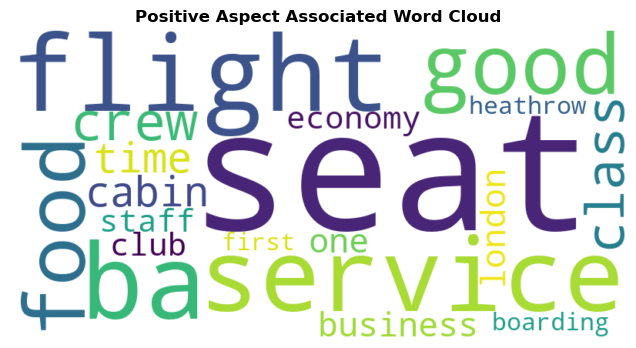

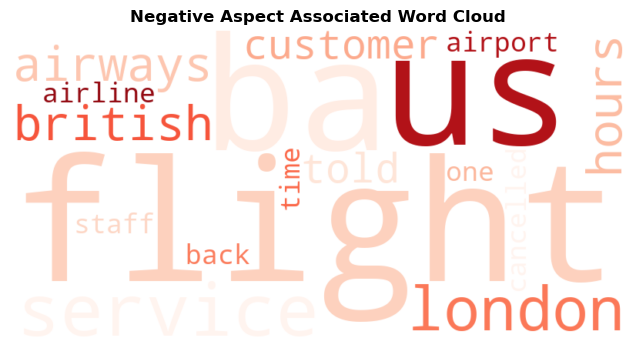

In [32]:
# Create a WordCloud for each topic
for topic_num, topic_words in topics:
    # Parse the top words from the topic
    top_words = [word.split('"')[1] for word in topic_words.split(' + ')]

    # Combine the top words into a single string
    topic_text = ' '.join(top_words)

    # Determine the title and colormap based on the topic number
    if topic_num == 0:
        title = 'Positive Aspect Associated Word Cloud'
        colormap = 'viridis'  # Use a green/yellow color palette for positive aspect
    else:
        title = 'Negative Aspect Associated Word Cloud'
        colormap = 'Reds'  # Use a red color palette for negative aspect

    # Create the WordCloud
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap=colormap).generate(topic_text)

    # Display the WordCloud with the custom title
    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontweight = 'bold')
    plt.axis('off')
    plt.show()

## Sentiment Analysis

In [35]:
# Import Necessary Packages
from textblob import TextBlob

In [36]:
# Determine sentiments from reviews
def analyze_sentiment(text):
    analysis = TextBlob(text)
    sentiment = analysis.sentiment.polarity
    if sentiment > 0:
        return "Positive"
    elif sentiment < 0:
        return "Negative"
    else:
        return "Neutral"
    
df['sentiment'] = df['reviews'].apply(analyze_sentiment)


In [37]:
# Calculate Sentiment Proportions
sentiment_counts = df['sentiment'].value_counts()
total_reviews = len(df)

positive_percentage = (sentiment_counts.get("Positive", 0) / total_reviews) * 100
negative_percentage = (sentiment_counts.get("Negative", 0) / total_reviews) * 100
neutral_percentage = (sentiment_counts.get("Neutral", 0) / total_reviews) * 100

print(f"Positive reviews: {positive_percentage:.2f}%")
print(f"Negative reviews: {negative_percentage:.2f}%")
print(f"Neutral reviews: {neutral_percentage:.2f}%")

Positive reviews: 63.90%
Negative reviews: 35.00%
Neutral reviews: 1.10%
